In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

fs = 8000 #Hz
temps_total = 1.2 #secondes

nb_echantillons = int(fs * temps_total)

f0 = 195 #Hz

vecteur_temps = np.linspace(0, temps_total, nb_echantillons)

In [31]:
%matplotlib inline

In [56]:
def sinusoide(amplitude, frequence, vecteur_temps):
    return amplitude * np.sin(2 * np.pi * frequence * vecteur_temps)

In [33]:
def rectangle(vecteur_temps, a, m = -1):

    rectangle = np.zeros((vecteur_temps.shape))

    if m == -1:
        m = np.take(vecteur_temps, vecteur_temps.size // 2)

    for i in range(vecteur_temps.shape[0]):
        if vecteur_temps[i] >= m - a / 2 and vecteur_temps[i] <= m + a / 2:
            rectangle[i] = 1;

    return rectangle

In [34]:
def picsAvecSuite(C0, C1, CN, f0, freq_limite = 3000):
    nActuel = 1
    CActuel = C1

    pics = np.zeros(int(freq_limite / f0) + 1)
    pics[0] = C0

    while nActuel * f0 < freq_limite:
        pics[nActuel] = CActuel

        CActuel = CN(CActuel)

        nActuel += 1

    return pics



In [35]:
def CNDivise4(CNAvant):
    return CNAvant / 4
    
def CNDivise2(CNAvant):
    return CNAvant / 2

In [66]:
def signalFromPics(pics, f0, duree, fs):

    signal = np.zeros((int(duree * fs),))

    for i in range(pics.shape[0]):
        signal += sinusoide(pics[i], i * f0, np.linspace(0, duree, int(fs * duree)))

    return signal


In [90]:
def modifierPicsFormants(formants, pics, f0, taille_bande = 100, valeur_mod = 4):
    picsMod = pics.copy()

    for f in formants:
        for i in range(pics.shape[0]):
            if i * f0 >= f - taille_bande and i * f0 <= f + taille_bande:
                picsMod[i] = valeur_mod

    return picsMod


In [67]:
sinF0 = sinusoide(1, f0, vecteur_temps)

In [68]:
Audio(sinF0, rate=fs)

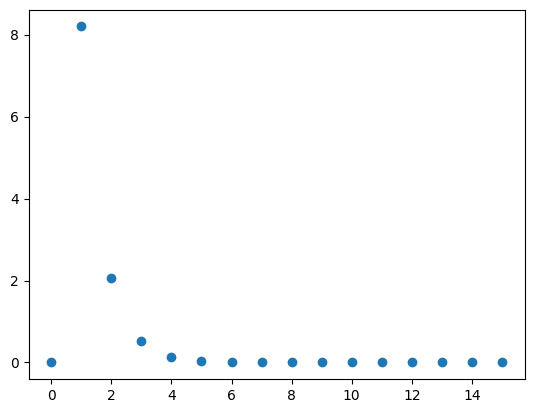

In [87]:
pics = picsAvecSuite(0, 8.2, CNDivise4, f0)

plt.scatter(range(pics.shape[0]), pics)

C:\Users\romai\AppData\Local\Temp\ipykernel_13104\391932075.py:4: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes.set_xlim(0.4, 0.4)


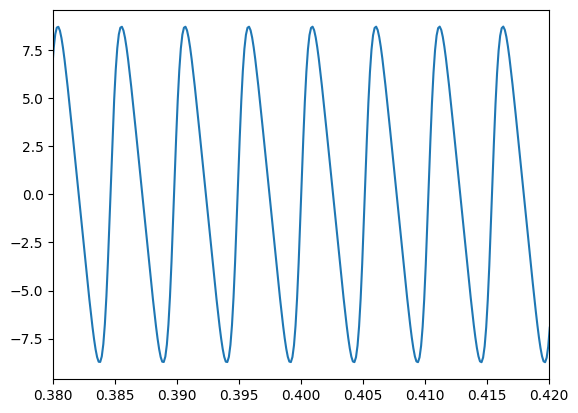

In [88]:
sig = signalFromPics(pics, f0, 1.2, fs)

axes = plt.subplot()
axes.set_xlim(0.4, 0.4)
axes.plot(vecteur_temps, sig)

In [85]:
Audio(sig, rate=fs)

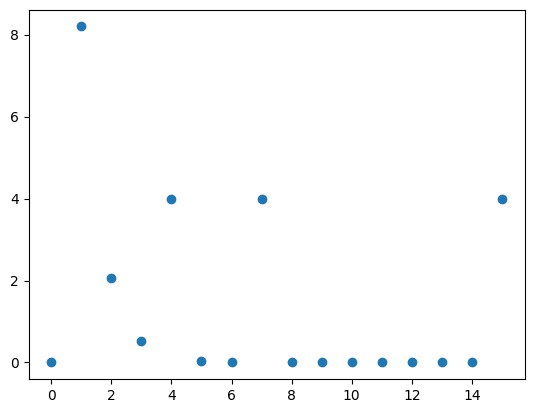

In [99]:
formantsU = [830, 1438, 2900, 4065]

picsMod = modifierPicsFormants(formantsU, pics, f0)

plt.scatter(range(picsMod.shape[0]), picsMod)

C:\Users\romai\AppData\Local\Temp\ipykernel_13104\662249866.py:4: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes.set_xlim(0.4, 0.4)


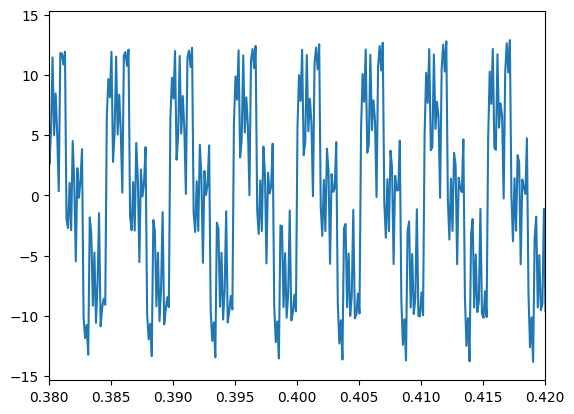

In [100]:
sig = signalFromPics(picsMod, f0, 1.2, fs)

axes = plt.subplot()
axes.set_xlim(0.4, 0.4)
axes.plot(vecteur_temps, sig)

In [101]:
Audio(sig, rate=fs)